In [1]:
import cv2
import numpy as np

In [2]:
pos_num = 700
neg_num = 600

In [3]:
win_size = (64, 128)
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
num_bins = 9
hog = cv2.HOGDescriptor(win_size, block_size, block_stride,
                        cell_size, num_bins)

In [4]:
X_pos = []
for i in range(pos_num):
    filename = "pos3/image%d.jpg" % (i+1)
    img = cv2.imread(filename)
    if img is None:
        print('Could not find image %s' % filename)
        continue
    X_pos.append(hog.compute(img, (64, 64)))

In [5]:
X_pos = np.array(X_pos, dtype=np.float32)
y_pos = np.ones(X_pos.shape[0], dtype=np.int32)
X_pos.shape, y_pos.shape

((700, 3780, 1), (700,))

import os
import random
hroi = 128
wroi = 64
X_neg = []
negdir = 'neg'
for negfile in os.listdir(negdir):
    filename = '%s/%s' % (negdir, negfile)
    img = cv2.imread(filename)
    img = cv2.resize(img, (512, 512))
    for j in range(15):
        rand_y = random.randint(0, img.shape[0] - hroi)
        rand_x = random.randint(0, img.shape[1] - wroi)
        roi = img[rand_y:rand_y + hroi, rand_x:rand_x + wroi, :]
        X_neg.append(hog.compute(roi, (64, 64)))

In [6]:
X_neg = []
for i in range(neg_num):
    filename_neg = "neg3/neg_image%d.jpg" % (i+1)
    img_neg = cv2.imread(filename_neg)
    if img_neg is None:
        print('Could not find image %s' % filename_neg)
        continue
    X_neg.append(hog.compute(img_neg, (64, 64)))

In [7]:
X_neg = np.array(X_neg, dtype=np.float32)
y_neg = np.zeros(X_neg.shape[0], dtype=np.int32)
X_neg.shape, y_neg.shape

((600, 3780, 1), (600,))

In [8]:
X = np.concatenate((X_pos, X_neg))#合并
y = np.concatenate((y_pos, y_neg))

In [9]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size=0.2, random_state=22
)

In [10]:
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_INTER)
def train_svm(X_train, y_train):
    svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    return svm

In [11]:
from sklearn import metrics
def score_svm(svm, X, y):
    _, y_pred = svm.predict(X)
    return metrics.accuracy_score(y, y_pred)

In [12]:
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

In [13]:
m = X_train.shape[0]
X_train.shape = (m, 3780,  1)
X_train.shape,y_train.shape

((1040, 3780, 1), (1040,))

In [14]:
svm = train_svm(X_train, y_train)

In [15]:
score_svm(svm, X_train, y_train),score_svm(svm, X_test, y_test)

(1.0, 1.0)

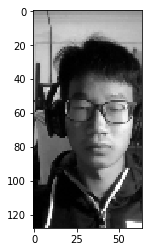

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
imgte = cv2.imread("pos2/image5.jpg")
ax.imshow(imgte)

In [19]:
cv2.destroyAllWindows()

In [20]:
capture = cv2.VideoCapture(0)#打开摄像头，0代表的是设备id，如果有多个摄像头，可以设置其他数值

yesno = []
haoaiyi = []
i=0
while True:
    ret, frame = capture.read() #读取摄像头,它能返回两个参数，第一个参数是bool型的ret，其值为True或False，代表有没有读到图片；第二个参数是frame，是当前截取一帧的图片
 #   frame = cv2.flip(frame, 1)#翻转 0:上下颠倒 大于0水平颠倒   小于180旋转
    
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame_gray = frame_gray[20:20+128*3, 250:250+64*3]
    cv2.imshow("gray", frame_gray)
    frame_gray_small = cv2.resize(frame_gray,(64,128))
 #   cv2.imwrite("neg3/neg_image%d.jpg"%i,frame_gray_small)
#    i = i+1
    date_hog = hog.compute(frame_gray_small, (64, 64))
    date_hog.shape = (1,3780,1)
    pre = svm.predict(date_hog)

    pre = np.array(pre, dtype=np.int32)
    flag = pre[1]
    yesno.append(flag)
    if flag == 1:
        print('yes')
        cv2.putText(frame,'OpenCV',(250,150), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)
    else:
        print('no')
    
    cv2.imshow("video", frame[20:20+128*3, 250:250+64*3])
    if cv2.waitKey(10) & 0xFF == ord('q'): #键盘输入q退出窗口，不按q点击关闭会一直关不掉 也可以设置成其他键。
            break 
cv2.destroyAllWindows()

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no

In [19]:
imgte = cv2.imread("aiai.jpg",0)
imgte = cv2.resize(imgte,(64,128))
test =  hog.compute(imgte, (64, 64))
test.shape = (1,3780,1)
pre = svm.predict(test)
pre = np.array(pre, dtype=np.int32)
test.shape,pre

((1, 3780, 1), array([0, 1]))